In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import glob
# Requires paramnb package to be installed
import param,paramnb

# Contents
### Data Frame
<div style="margin-left:50px">
<a href="#filesel">File selector</a><br>
<a href="#shape">Shape</a><br>
<a href="#cols">Column names and data types</a><br>
<a href="#preview">Preview</a><br>
</div>

### Column
<div style="margin-left:50px">
<a href="#colsel">Column selector</a><br>
<a href="#coldescription">Description</a><br>
<a href="#colvalues">Values count</a><br>
</div>

### Filter
<div style="margin-left:50px">
<a href="#colsel">Column selector</a><br>
</div>

In [2]:
# Define global variables

available_encodings=[
"utf-8",
"latin1"
]

available_dtypes=[
    "Do not convert",
    "Numeric (remove commas)"
]

class DataConverters():
    def remove_commas(series):
        for i,val in enumerate(series):
            if type(val)=="str":
                series[i]=str(series[i]).replace(",","")
        return series

# <font color="goldenrod">Enter a list of input files here to get started </font>

<a name="filesel"></a>

In [3]:
# A list of input files

# obtained by wildcard
#path2files=glob.glob("")

# OR from a list
path2files=[
    "train.csv"
]

class FileSelector(param.Parameterized):
    selected_file=param.ObjectSelector(objects=path2files)
    file_encoding=param.ObjectSelector(default="utf-8",objects=available_encodings)

paramnb.Widgets(FileSelector,next_n=4)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a name="shape"></a>

In [4]:
# Read file into a data frame
if FileSelector.selected_file.endswith("csv"):
    df=pd.read_csv(FileSelector.selected_file,encoding=FileSelector.file_encoding)
elif FileSelector.selected_file.endswith("xlsx") or FileSelector.selected_file.endswith("xls"):
    df=pd.read_excel(FileSelector.selected_file,encoding=FileSelector.file_encoding)

print("Rows: {}\tCols: {}".format(df.shape[0],df.shape[1]))

Rows: 891	Cols: 12


<a name="cols"></a>

In [5]:
pd.DataFrame({"Column Names":df.columns.values,"Data Types":df.dtypes.values})

,Column Names,Data Types
0,PassengerId,int64
1,Survived,int64
2,Pclass,int64
3,Name,object
4,Sex,object
5,Age,float64
6,SibSp,int64
7,Parch,int64
8,Ticket,object
9,Fare,float64


<a name="preview"></a>

In [6]:
df.sample(10).transpose()

,526,29,607,459,265,215,445,719,161,240
PassengerId,527,30,608,460,266,216,446,720,162,241
Survived,1,0,1,0,0,1,1,0,1,0
Pclass,2,3,1,3,2,1,1,3,2,3
Name,"Ridsdale, Miss. Lucy","Todoroff, Mr. Lalio","Daniel, Mr. Robert Williams","O'Connor, Mr. Maurice","Reeves, Mr. David","Newell, Miss. Madeleine","Dodge, Master. Washington","Johnson, Mr. Malkolm Joackim","Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...","Zabour, Miss. Thamine"
Sex,female,male,male,male,male,female,male,male,female,female
Age,50,NaN,27,NaN,36,31,4,33,40,NaN
SibSp,0,0,0,0,0,1,0,0,0,1
Parch,0,0,0,0,0,0,2,0,0,0
Ticket,W./C. 14258,349216,113804,371060,C.A. 17248,35273,33638,347062,C.A. 33595,2665
Fare,10.5,7.8958,30.5,7.75,10.5,113.275,81.8583,7.775,15.75,14.4542


# <font color="goldenrod">Select a column to take a closer look</font>

<a name="colsel"></a>

In [7]:
class ColumnSelector(param.Parameterized):
    selected_col=param.ObjectSelector(objects=df.columns.values)
    convert_dtype=param.ObjectSelector(default="Do not convert",objects=available_dtypes)
    
paramnb.Widgets(ColumnSelector,next_n=3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a name="coldescription"></a>

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


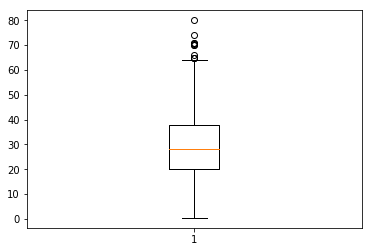

In [8]:
if not ColumnSelector.convert_dtype=="Do not convert":
    if ColumnSelector.convert_dtype=="Numeric (remove commas)":
        column_series=DataConverters.remove_commas(df[ColumnSelector.selected_col])
        column_series=pd.to_numeric(column_series,errors="coerce")
else:
    column_series=df[ColumnSelector.selected_col]

print(column_series.describe())

if np.issubdtype(column_series.dtype,np.number):
    plt.boxplot(column_series.dropna())

<a name="colvalues"></a>

NA count: 177


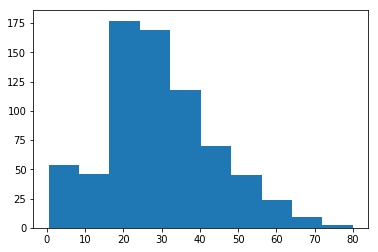

In [9]:
if np.issubdtype(column_series.dtype,np.number):
    print("NA count: {}".format(np.sum(pd.isnull(column_series))))
    plt.hist(column_series.dropna())
else:
    print("NA count: {}".format(np.sum(pd.isnull(column_series))))
    print(pd.DataFrame(column_series.value_counts(dropna=False)))

# <font color="goldenrod">Look at data filtered by the selected column</font>

In [10]:
if np.issubdtype(column_series.dtype,np.number):
    class FilterSelector(param.Parameterized):
        filter_by_value=param.Range(bounds=(column_series.min(), column_series.max()))
else:    
    class FilterSelector(param.Parameterized):
        filter_by_value=param.ObjectSelector(objects=column_series.values)

if not np.issubdtype(column_series.dtype,np.number):
# May take too long to load
    if len(column_series.unique())<2000:
        paramnb.Widgets(FilterSelector,next_n=1)
else:
    paramnb.Widgets(FilterSelector,next_n=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
if np.issubdtype(column_series.dtype,np.number):
    display(df[list(df[ColumnSelector.selected_col]>=FilterSelector.filter_by_value[0]) and list(df[ColumnSelector.selected_col]<=FilterSelector.filter_by_value[1])].sample(10).transpose())
else:
    display(df[df[ColumnSelector.selected_col]==FilterSelector.filter_by_value].sample(10).transpose())

,672,625,675,693,775,536,389,56,695,794
PassengerId,673,626,676,694,776,537,390,57,696,795
Survived,0,0,0,0,0,0,1,1,0,0
Pclass,2,1,3,3,3,1,2,2,2,3
Name,"Mitchell, Mr. Henry Michael","Sutton, Mr. Frederick","Edvardsson, Mr. Gustaf Hjalmar","Saad, Mr. Khalil","Myhrman, Mr. Pehr Fabian Oliver Malkolm","Butt, Major. Archibald Willingham","Lehmann, Miss. Bertha","Rugg, Miss. Emily","Chapman, Mr. Charles Henry","Dantcheff, Mr. Ristiu"
Sex,male,male,male,male,male,male,female,female,male,male
Age,70,61,18,25,18,45,17,21,52,25
SibSp,0,0,0,0,0,0,0,0,0,0
Parch,0,0,0,0,0,0,0,0,0,0
Ticket,C.A. 24580,36963,349912,2672,347078,113050,SC 1748,C.A. 31026,248731,349203
Fare,10.5,32.3208,7.775,7.225,7.75,26.55,12,10.5,13.5,7.8958


# <font color="goldenrod">Distribution of a column after filtering</font>

# Do not change codes above, insert your custom codes below